**Inferences for Two Population Means Using Paired Samples**

Let us now turn to a hypothesis testing procedure for the difference between two population means when the samples are **dependent**. If for example two data values are collected from the same source (or element), these are called **paired** or **matched samples**.

Very often these procedures are applied for **Before-After-Control-Impact (BACI)** analysis. Imagine a case when you are asked to evaluate the effectiveness of a filtering system in removing air pollutants being released by a factory. In that case one population consists of measurements of air quality before the filtering system is implemented or renewed, and the other population consists of measurements of air quality after the new filter system was installed. In that case you are dealing with paired samples, because the two data sets are collected from the same source, the factory.

In paired samples, the difference between the data values of the two samples is denoted by $d$, often called **paired difference**. Note that the sample size $n$ for each sample is equal. The mean of the paired differences for the samples is denoted as $\bar{d}$.

$$\bar d = \frac{\sum d}{n}$$

The standard deviation of paired differences for two samples, $s_d$ is calculated as

$$s_d = \sqrt{\frac{\sum d^2 - \frac{(\sum d)^2}{n}}{n-1}}$$

Suppose that the paired-difference variable $d$ is normally distributed, then the paired $t$-statistic is expressed as

$$t= \frac{\bar d - (\mu_1-\mu_2)}{\frac{s_d}{\sqrt{n}}}\text{,}$$

which simplifies to

$$t = \frac{\bar{d}}{s_d/\sqrt{n}},$$

if $\mu_1 - \mu_2 = 0$.  The test statistic $t$ for paired samples follows a $t$-distribution with $df=n-1$.


**Interval estimation of $\mu_d$**

The $100(1-\alpha)$% confidence interval for $\mu_d$ is 

$$\bar{d} \pm t \times \frac{s_d}{\sqrt{n}}$$

where the value of $t$ is obtained from the $t$-distribution for the given confidence level and $n-1$ degrees of freedom.


**The paired $t$-test: An example**

We work with the *students* data set.


In order to showcase the paired $t$-test for dependent samples **we are interested in the question if an online statistics learning tutorial helps students to improve their grades**. There are three variables of interest in *students* data set. The variable *online.tutorial*, is a binary variable, which is $1$ if the student completed the online statistics learning tutorial or $0$ otherwise. The variable *score1* and *score2* show the grades ($0-100$) for two exams on mathematics and statistics. The higher the value, the better the particular students performed. Please note, that the first exam takes place before the students attended the online statistics learning tutorial. The participation in the online statistics learning tutorial is not mandatory, however the two exams are obligatory for all students. The first exam (*score1*) takes place at the beginning of the $3^{rd}$ semester, the second exam (*score2*) takes place at the end of the $3^{rd}$ semester.

Basically, there are two research questions of interest. **First, we want to examine if the group of students which took the online statistics learning tutorial performs better on the second exam compared to the first exams. Second, we test how the group of students that did not join the online statistics learning tutorial performed on both the test.**

**Data preparation**

We start with the first research question and focus on those students that took the online statistics learning tutorial.

For data preparation we subset the data set based on the variable *online.tutorial*, which indicates if the student took the tutorial or not (1 = yes, 0 = no). Then, we randomly sample $65$ students from the data set and extract the two variables of interest, *score1* and *score2*. We store each of them in array, named *score1_sample* and *score2_sample*

In [2]:
import pandas as pd
import numpy as np

students_df = pd.read_csv("https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv")

tutorial = students_df[students_df['online.tutorial']==1]

n=65

score1_sample = np.random.choice(tutorial['score1'], n)
score2_sample = np.random.choice(tutorial['score2'],n)

Now compute the paired differences, $d$, and plot them.

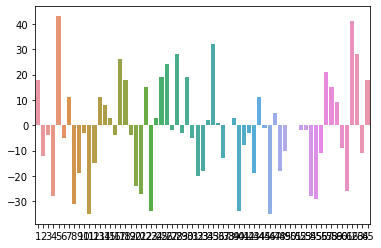

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

d = score1_sample - score2_sample


sns.barplot(x=list(range(1,len(d)+1)), y=d)

plt.xlabel('')

pass

The plot looks as expected. Some students perform better in the first exam compared to the second exam and vice versa.

In order to check the normality assumption we again rely on a visual inspection of **Q-Q plot**. If the variable is normally distributed, the **Q-Q** plot should be roughly linear. 

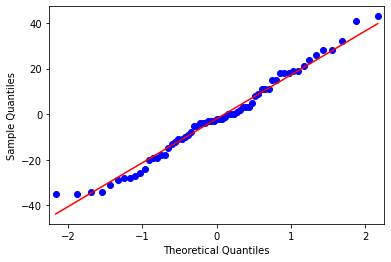

In [25]:
import statsmodels.api as sm

sm.qqplot(d, line='q')

pass

Not super exact and a bit noisy, but the data seems to be roughly normally distributed.

We further calculate $\bar{d}$ the mean of the paired differences

$$\bar{d} = \frac{\sum d}{n},$$

and $s_d$, the standard deviation of the paired differences for two samples

$$s_d = \sqrt{\frac{\sum d^2 - \frac{(\sum d)^2}{n}}{n-1}}\text{.}$$

In [26]:
# paired differences

import math

d_bar = np.sum(d)/len(d)

s_d = math.sqrt((np.sum(d**2)-((np.sum(d)**2)/len(d)))/(n-1))

**Hypothesis testing**

Now we are ready to apply the **paired $t$-test**. Recall our first research question: **Does the data provide stufficient evidence to conclude that the mean exam results improve if students take an online statistics learning tutorial?**

We follow the step-wise implementation procedure for hypothesis testing.

**Step 1: State the null hypothesis $H_0$ and alternative hypothesis $H_A$**

The null hypothesis statest that there is no difference in the mean of the exam grades of one exam compared to the other.

$$H_0 : \mu_1 = \mu_2$$

Recall, that the formulation of the alternative hypothesis dictates if we apply a two-sided, a left tailed or a right tailed hypothesis test.

**Alternative hypothesis**

$$H_A : \mu_1 < \mu_2$$

This formulation resutls in a left tailed hypothesis test and states that the students on average perform better on the second exam.

**Step 2: Decide on the siginificance level, $\alpha$**

$$\alpha = 0.05$$

In [27]:
alpha = 0.05

**Step 3 and 4: Compute the value of the test statistic and the $p$-value.**

For illustration purposes we manually compute the test statistic in Python. Recall the equation form above:

$$t= \frac{\bar d - (\mu_1-\mu_2)}{\frac{s_d}{\sqrt{n}}}$$

If $H_0$ is true, then $\mu_1 - \mu_2 = 0$ and thus, the equation simplifies to 

$$t= \frac{\bar d}{\frac{s_d}{\sqrt{n}}}\text{.}$$

In [28]:
# compute the value of the test statistics

t_statistic = d_bar / (s_d / (math.sqrt(len(d))))

t_statistic

-0.7792654471381472

In order to calculate the $p$-value we apply the *cdf* function. Recall how to calculate the degrees of freedom.

$$df= n-1 = 64$$

In [30]:
# Compute the p-value

from scipy.stats import t

df = len(d)-1

p = t.cdf(t_statistic, df=df)
p

0.219347725794432

In [31]:
from scipy.stats import ttest_rel

ttest_rel(score1_sample, score2_sample)

Ttest_relResult(statistic=-0.7792654471381473, pvalue=0.438695451588864)

**Step 5: If $p\leq \alpha$ reject $H_0$; otherwise, do not reject $H_0$**.

The p-value is more than the specified significance level of $0.05$; we do not reject $H_0$. The test results are statistically significant at the $5$% level and do not provide evidence against the null hypothesis.

Before we continue, there is still one research question to be answered. What if there are other reasons for better grades on the second exam? What if the second exam was much easier? What if the students had an awesome lecturer and thus improved during the semester? We test that hypothesis by conducting a paired $t$-test, explicitly for those students who did not take the online statistics learning tutorial. 

In [42]:
no_tutorial = students_df[students_df['online.tutorial']==0]

no_tutorial=no_tutorial.dropna(subset=['score1','score2'])

n = 65

score1_notut = np.random.choice(no_tutorial['score1'],n)
score2_notut = np.random.choice(no_tutorial['score2'],n)

In [44]:
ttest_rel(score1_notut, score2_notut)

Ttest_relResult(statistic=0.08914662685135383, pvalue=0.9292437677521748)

The p-value is greater than the specified significance level of 0.05; we do not reject H0. The test results are statistically significant at the 5% level and provide not sufficient evidence against the null hypothesis.

At the 5% significance level, the data does not provide sufficient evidence to conclude that the exam grades of students, who did not attend the online tutorial, improved.